accuracy : 0.983
[[-4.38678718 -4.36678718 -4.34678718 ...  3.87321282  3.89321282
   3.91321282]
 [-4.38678718 -4.36678718 -4.34678718 ...  3.87321282  3.89321282
   3.91321282]
 [-4.38678718 -4.36678718 -4.34678718 ...  3.87321282  3.89321282
   3.91321282]
 ...
 [-4.38678718 -4.36678718 -4.34678718 ...  3.87321282  3.89321282
   3.91321282]
 [-4.38678718 -4.36678718 -4.34678718 ...  3.87321282  3.89321282
   3.91321282]
 [-4.38678718 -4.36678718 -4.34678718 ...  3.87321282  3.89321282
   3.91321282]]
-----------------
[[-4.38678718 -4.38678718 -4.38678718 ... -4.38678718 -4.38678718
  -4.38678718]
 [-4.36678718 -4.36678718 -4.36678718 ... -4.36678718 -4.36678718
  -4.36678718]
 [-4.34678718 -4.34678718 -4.34678718 ... -4.34678718 -4.34678718
  -4.34678718]
 ...
 [ 3.87321282  3.87321282  3.87321282 ...  3.87321282  3.87321282
   3.87321282]
 [ 3.89321282  3.89321282  3.89321282 ...  3.89321282  3.89321282
   3.89321282]
 [ 3.91321282  3.91321282  3.91321282 ...  3.91321282  3.913212

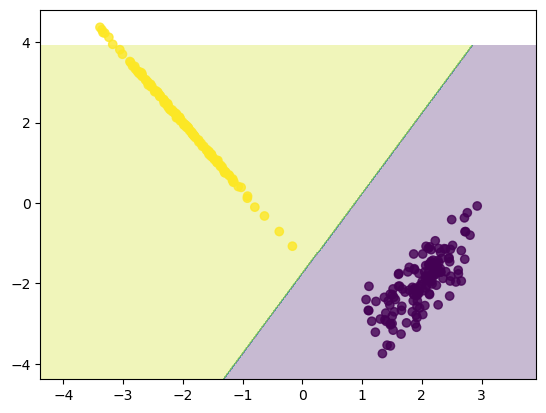

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles,make_moons,make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

np.random.seed(7)
x,y = make_classification(n_samples=400,n_features=2,n_redundant=0,
                          n_informative=2,n_clusters_per_class=1,class_sep=2.0,random_state=7)

xtr, xte,ytr,ytee = train_test_split(x,y,test_size=0.3,random_state=7,stratify=y)

clf = Perceptron(max_iter=1000,eta0=0.1,random_state=7,tol=1e-5)
clf.fit(xtr,ytr)
prd = clf.predict(xte)
acc = accuracy_score(ytee,prd)
print(f"accuracy : {acc:.3f}")

h = 0.02
x_min,x_max = x[:,0].min()-1 , x[:,0].max()+1
y_min,y_max = x[:,0].min()-1 , x[:,0].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                    np.arange(y_min,y_max,h))
print(xx)
print("-----------------")
print(yy)
z = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
print("--------------")
print(z)
plt.figure()
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(xtr[:,0], xtr[:,1], c=ytr, alpha=0.8)
# plt.title("Perceptron on Linearly Separable Data")
# plt.xlabel("x1"); plt.ylabel("x2")
# plt.show()

In [7]:
xm,ym = make_moons(n_samples=400,noise=0.2,random_state=7)

xm_tr,xm_te,ym_tr,ym_te = train_test_split(xm,ym,test_size=0.3,random_state=7)

p_moon = Perceptron(max_iter=2000,eta0=0.1,random_state=7,tol=1e-5)
p_moon.fit(xm_tr,ym_tr)
predm = p_moon.predict(xm_te)
acc = accuracy_score(ym_te,predm)

print(f"Prceptron accuracy (moon) : {acc:.3f}")

Prceptron accuracy (moon) : 0.783


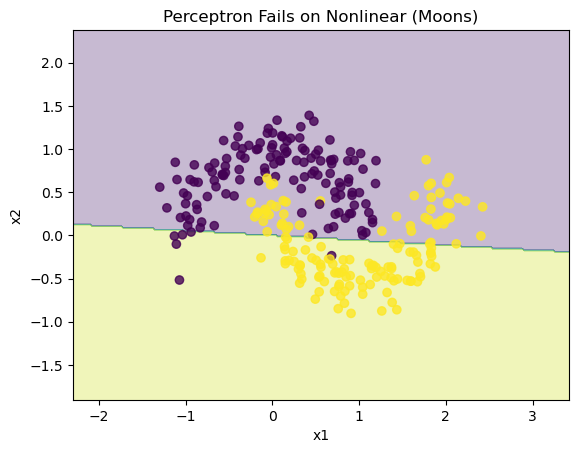

In [8]:
h = 0.02
x_min, x_max = xm[:,0].min()-1, xm[:,0].max()+1
y_min, y_max = xm[:,1].min()-1, xm[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = p_moon.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(xm_tr[:,0], xm_tr[:,1], c=ym_tr, alpha=0.8)
plt.title("Perceptron Fails on Nonlinear (Moons)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

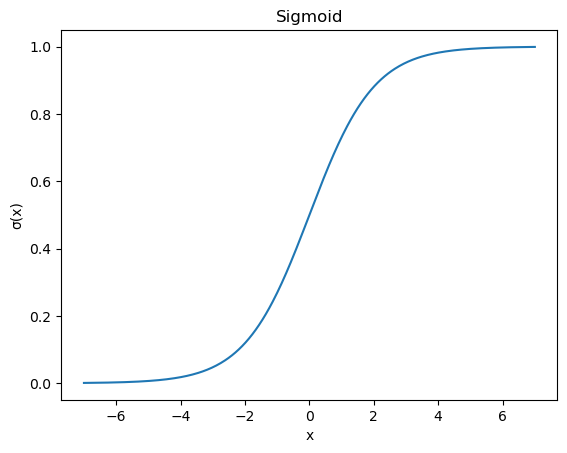

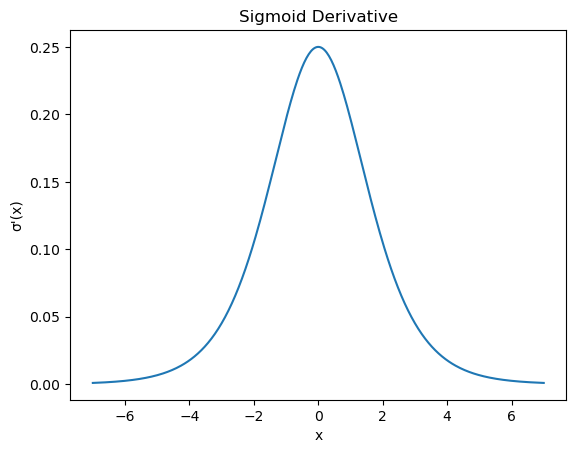

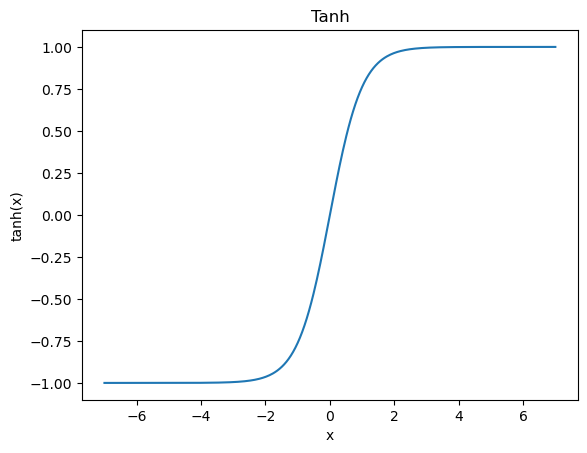

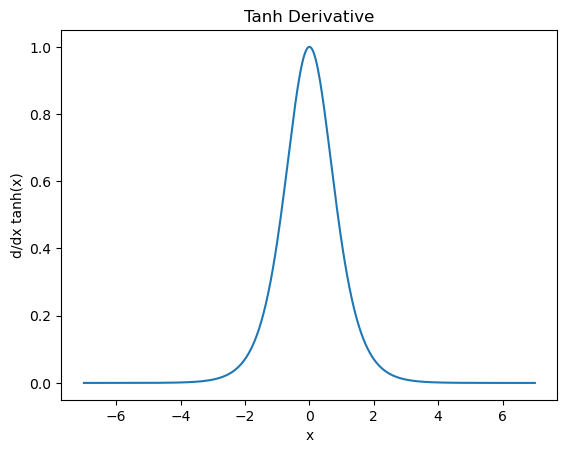

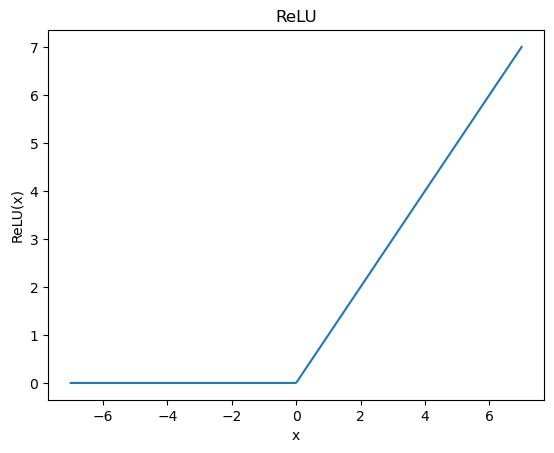

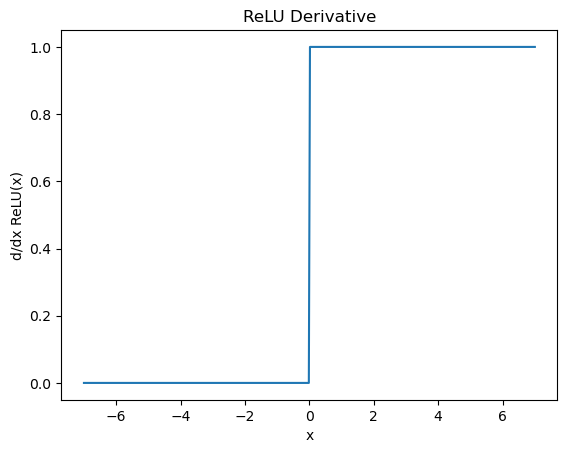

In [9]:
# Plot functions (one figure per chart, as requested)
xs = np.linspace(-7, 7, 400)

# Define activations and derivatives
def sigmoid(x):
    return 1/(1+np.exp(-x))

def dsigmoid(x):
    s = sigmoid(x)
    return s*(1-s)
# # Sigmoid
plt.figure()
plt.plot(xs, sigmoid(xs))
plt.title("Sigmoid")
plt.xlabel("x"); plt.ylabel("σ(x)")
plt.show()

plt.figure()
plt.plot(xs, dsigmoid(xs))
plt.title("Sigmoid Derivative")
plt.xlabel("x"); plt.ylabel("σ'(x)")
plt.show()

def tanh(x):
    return np.tanh(x)

def dtanh(x):
    t = np.tanh(x)
    return 1 - t**2

# Tanh
plt.figure()
plt.plot(xs, tanh(xs))
plt.title("Tanh")
plt.xlabel("x"); plt.ylabel("tanh(x)")
plt.show()

plt.figure()
plt.plot(xs, dtanh(xs))
plt.title("Tanh Derivative")
plt.xlabel("x"); plt.ylabel("d/dx tanh(x)")
plt.show()

def relu(x):
    return np.maximum(0, x)

def drelu(x):
    return (x>0).astype(float)

# ReLU
plt.figure()
plt.plot(xs, relu(xs))
plt.title("ReLU")
plt.xlabel("x"); plt.ylabel("ReLU(x)")
plt.show()

plt.figure()
plt.plot(xs, drelu(xs))
plt.title("ReLU Derivative")
plt.xlabel("x"); plt.ylabel("d/dx ReLU(x)")
plt.show()



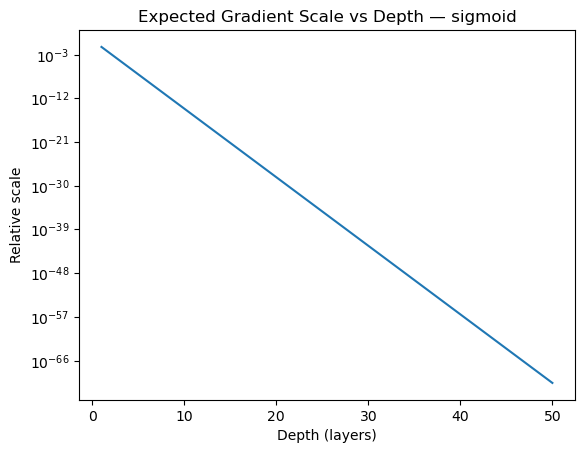

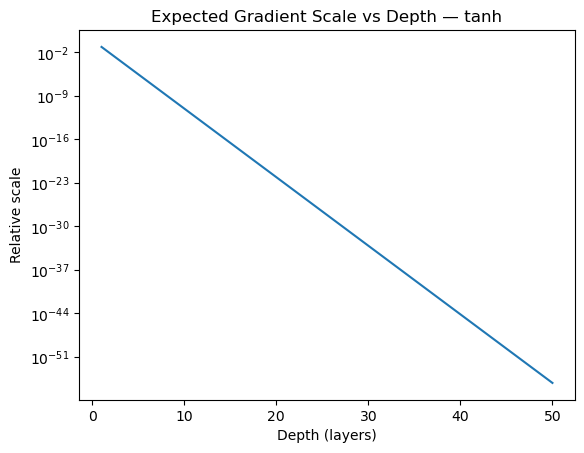

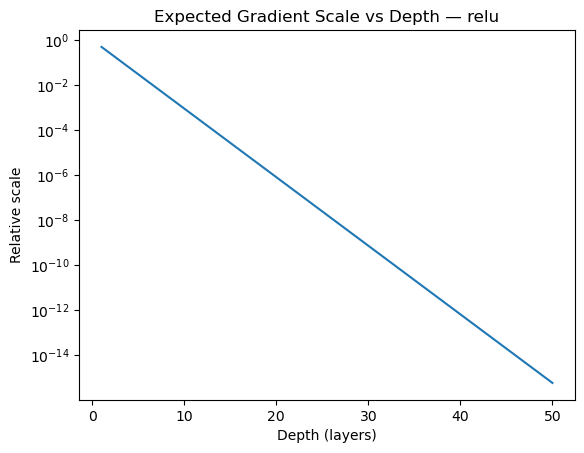

In [10]:
rng = np.random.default_rng(7)
def eexpcted_grad_scale(activation,samples=20000):
    if activation == "relu":
        z = np.random.normal(0,np.sqrt(16),samples)
        g = sigmoid(z)
    elif activation == "sigmoid":
        z = np.random.normal(0,10,samples)
        g = dsigmoid(z)
    elif activation == "tanh":
        z = np.random.normal(0,10,samples)
        g = dtanh(z)
    else:
        raise ValueError("Unknown activation")
    return np.mean(np.abs(g))

depths = np.arange(1,51)

scales = {a: [] for a in ["sigmoid","tanh","relu"]}

bass = {a: eexpcted_grad_scale(a) for a in scales}
for d in depths:
    for a in scales:
        scales[a].append(bass[a]**d)

for a in scales:
    plt.figure()
    plt.plot(depths, scales[a])
    plt.title(f"Expected Gradient Scale vs Depth — {a}")
    plt.xlabel("Depth (layers)"); plt.ylabel("Relative scale")
    plt.yscale("log")
    plt.show() 

for a in scales:
    plt.figure()
    plt.plot(depths, scales[a])
    plt.title(f"Expected Gradient Scale vs Depth — {a}")
    plt.xlabel("Depth (layers)"); plt.ylabel("Relative scale")
    plt.yscale("log")
    plt.show()

In [11]:
def plot_decision_surface(model,x,y,title):
    h = 0.02
    x_min, x_max = x[:,0].min() - 1.0, x[:,0].max() + 1.0
    y_min, y_max = x[:,1].min() - 1.0, x[:,1].max() + 1.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(x[:,0], x[:,1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

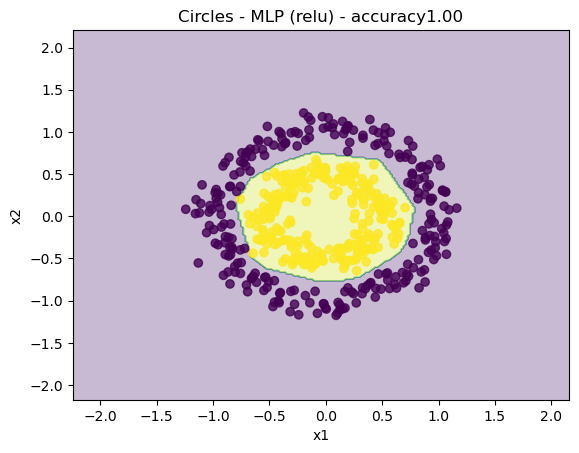

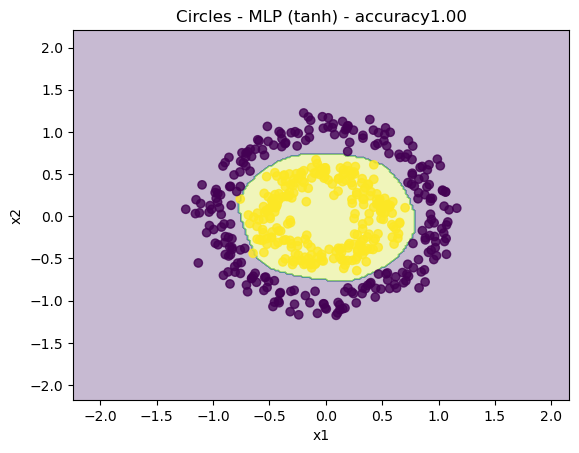

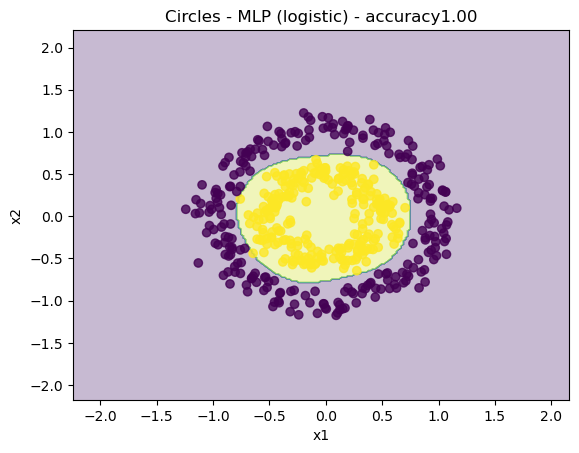

In [12]:
datasets = {
    "Circles": make_circles(n_samples=500,noise=0.1,factor=0.5,random_state=2)
}

for name,(xd,yd) in datasets.items():
    n_classes = len(np.unique(yd))
    for act in ["relu","tanh","logistic"]:
        clf = MLPClassifier(hidden_layer_sizes=(16,16),activation=act,
                            learning_rate_init=0.05,max_iter=1000,random_state=7)
        clf.fit(xd,yd)
        acc = clf.score(xd,yd)
        plot_decision_surface(clf,xd,yd, f"{name} - MLP ({act}) - accuracy{acc:.2f}")
        